## Automatic Ticket Assignment
One of the key activities of any IT function is to ensure there is no
impact to the Business operations. <b>IT leverages Incident Management process to achieve the
above Objective.</b> An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. <b><i>The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.</i></b>

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring
systems and tools. <b>Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.</b>

<i> Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.</i>
#### <b>Business Domain Value:</b> 
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56%
of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

## Objective:
### Build Multi-Class classifier that can classify the tickets by analysing text.###
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks. In the previous milestone we've already covered Data cleaning, preprocessing, Exploratory Data Analysis

Milestone 2: Test the Model, Fine-tuning and Repeat
  1. Test the model and report as per evaluation metrics
  2. Try different models
  3. Try different evaluation metrics
  4. Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
  5. Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.
---

### <u>Imports and Configurations</u>
Section to import all necessary packages. Install the libraries which are not included in Anaconda distribution by default using pypi channel or conda forge
**``!pip install ftfy wordcloud goslate spacy plotly cufflinks gensim pyLDAvis``**<br/>
**``conda install -c conda-forge ftfy wordcloud goslate spacy plotly cufflinks gensim pyLDAvis``**

In [1]:
# Utilities
from time import time
from PIL import Image
from pprint import pprint
from zipfile import ZipFile
import os, sys, itertools, re, calendar
import warnings, pickle, string, timestring
from IPython.display import IFrame
from ftfy import fix_encoding, fix_text, badness

# Translation APIs
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import pyLDAvis
import pyLDAvis.gensim

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Topic Modeling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize
from nltk.corpus import stopwords

Using TensorFlow backend.
C:\Users\aksha\Anaconda3\lib\site-packages\keras\callbacks.py:20: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\Users\aksha\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

C:\Users\aksha\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly

C:\Users\aksha\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [2]:
# Configure for any default setting of any library
nltk.download('stopwords')
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
pyLDAvis.enable_notebook()
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <u>Set the working directory</u>
Mount the drive and set the project path to cureent working directory, when running in Google Colab. No changes are required in case of running in Local PC.

In [3]:
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Current working directory D:\Hands-On\PGP-AIML\CaseStudies\Capstone Projects\1-NLP-Automatic.Ticket.Assignment


### <u>Create Word Embbeddings</u>
We've observed poor performance in the 1st milestone, which enables us to create our own word embbeddings. Let's load the preprocessed dataset and use Gensim model to create Word2Vec embbeddings.

Word embedding is one of the most important techniques in natural language processing(NLP), where words are mapped to vectors of real numbers. Word embedding is capable of capturing the meaning of a word in a document, semantic and syntactic similarity, relation with other words.

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling.

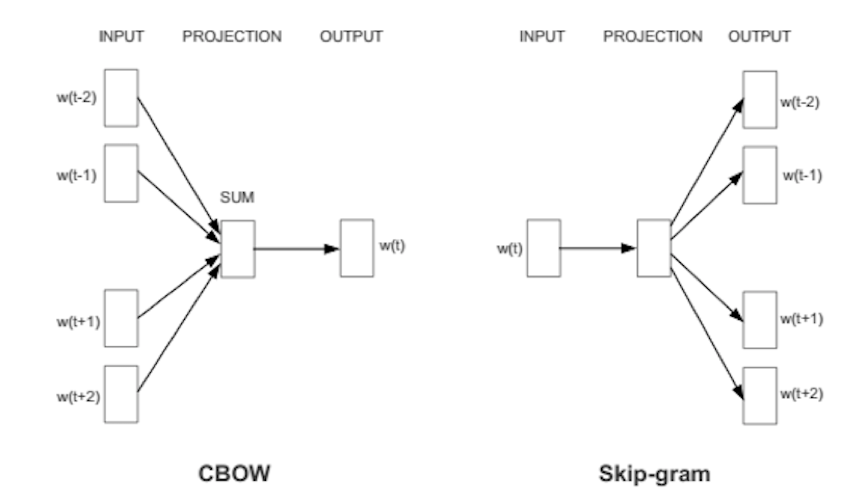

In [4]:
# Load the preprocessed pickle dataset
with open('preprocessed_ticket.pkl','rb') as f:
    ticket = pickle.load(f)
    
# Function to create the tokenized sentence
def tokenize_sentences(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc if token.lemma_ !='-PRON-' and not token.is_stop]

sentence_stream=[]
for sent in ticket.Summary.values.tolist():
    sentence_stream.append(tokenize_sentences(sent))

In [5]:
# Create the Bigram and Trigram models
bigram = Phrases(sentence_stream, min_count=2, threshold=2)
trigram = Phrases(bigram[sentence_stream], min_count=2, threshold=1)
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)
ngram_sentences=[]
for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]
    #print("Bigrams Tokens:\t", tokens_)
    tokens_ = trigram_phraser[tokens_]
    ngram_sentences.append(tokens_)
    
#Serialize bigram and trigram for future
bigram_phraser.save('bigram_mdl_14_03_2020.pkl')
trigram_phraser.save('trigram_mdl_14_03_2020.pkl')

In [6]:
# Create the tagged documents
documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(ngram_sentences)]
print("Length of Tagged Documents:",len(documents))
print("Tagged Documents[345]:",documents[345])

Length of Tagged Documents: 27101
Tagged Documents[345]: TaggedDocument(['monitor', 'video', 'measure_machine', 'supply', 'oziflwma', 'nhgvmqdl', 'monitor', 'video', 'measure_machine', 'supply', 'oziflwma', 'nhgvmqdl', 'general_lines1'], [345])


In [7]:
# Build the Word2Vec model
max_epochs = 100
vec_size = 300
alpha = 0.025
model = Doc2Vec(vector_size=vec_size,window=2,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=2,
                dm =1)
model.build_vocab(documents)

for epoch in range(max_epochs):
    model.train(documents, 
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_inc_model.mdl")
print("Model Saved")

Model Saved


**Comments**:
Word Embbeddings are generated from the corpus of our tickets dataset and serialized for further use.

### <u>Load the dataset</u>
We've observed poor performance in the 1st milestone, which enables us to introduce 2 more attributes, such as:

- **Shift**: Working shift of the support associate in which the ticket was recieved OR failure occured
- **Lines**: Lines of text present in the ticket description column
Load the searialized dataset stored after 1st milestone's EDA and append the above attributes to them. Also drop sd_len, sd_word_count, desc_len, desc_word_count columns

In [8]:
# Function to determine the Part of the Day (POD)
def get_POD(tkt):
    dt1 = r"(?:\d{1,2}[\/-]){2}\d{4} (?:\d{2}:?){3}"
    dt2 = r"\d{4}(?:[\/-]\d{1,2}){2} (?:\d{2}:?){3}"
    months = '|'.join(calendar.month_name[1:])
    dt3 = fr'[a-zA-Z]+day, (?i:{months}) \d{{1,2}}, \d{{4}} \d{{1,2}}:\d{{1,2}} (?i:am|pm)'
    matches = set(re.findall('|'.join([dt1,dt2,dt3]), tkt))
    if len(matches):
        try:
            hr = timestring.Date(list(matches)[0]).hour
            return 'Morning' if (hr >= 6) and (hr < 18) else 'Night'
        except:
            pass
    return 'General'

In [9]:
# Get POD and lines of Desc from the unprocessed pickle
with open('translated_ticket.pkl','rb') as f:
    ticket = pickle.load(f)

lines = ticket.Description.apply(lambda x: len(str(x).split('\n')))
shifts = ticket[['Short description', 'Description']].agg(lambda x: get_POD(str(x[0]) + str(x[1])), axis=1)
shifts.value_counts()

General    7508
Night       569
Morning     423
dtype: int64

In [10]:
# Load the serialized dataset after milestone-1
with open('model_ready.pkl','rb') as handle:
    ticket = pickle.load(handle)

# Drop the unwanted columns
ticket.drop(['sd_len','sd_word_count','desc_len','desc_word_count','Caller'], axis=1, inplace=True)
# Insert the new attributes
ticket.insert(loc=ticket.shape[1]-1, column='Shift', value=shifts)
ticket.insert(loc=ticket.shape[1]-1, column='Lines', value=lines)

# Check the head of the dataset
ticket.head()

,Short description,Description,Language,Summary,Shift,Lines,Assignment group
0,login issue,verified user detailsemployee manager name che...,English,login issue verified user detailsemployee mana...,General,5,GRP_0
1,outlook,receive from hmjdrvpb.komuaywn@gmail.com hello...,English,outlook receive from hmjdrvpb.komuaywn@gmail.c...,General,7,GRP_0
2,can not log in to vpn,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,English,can not log in to vpn receive from eylqgodm.yb...,General,7,GRP_0
3,unable to access hrtool page,unable to access hrtool page,English,unable to access hrtool page unable to access ...,General,1,GRP_0
4,error skype,error skype,English,error skype error skype,General,1,GRP_0


#### Observation from Milestone-1
Out of all the models we've tried in Milestone-1, Support Vector Machine (SVM) under statistical ML algorithms and Neural Networks are performing better than all others. The models were highly overfitted and one of the obvious reason was the dataset was highly imbalanced. Ratio of GRP_0 to all others is 47:53 and there are 40 groups having less than or equal to 30 tickets assigned each.

Let's address this problem to fine tune the model accuracy by implementing
- Dealing with imbalanced dataset. 
    - Creating distinctive clusters under GRP_0 and downsampling top clusters
    - Clubbing together all those groups into one which has 30 or less tickets assigned
- Replacing TF-IDF vectorizer technique with word embeddings for statistical ML algorithms.

### <u>Resampling the Imbalanced dataset</u>
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
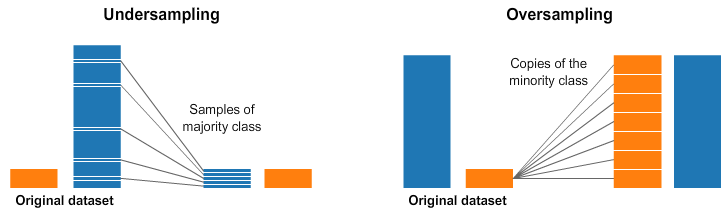


### Topic Modeling
Topic Modeling is a technique to extract the hidden topics from large volumes of text. **Latent Dirichlet Allocation(LDA)** is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

Let's first use gensim to implement LDA and find out any distinctive topics among GRP_0, followed by down-sampling the top 3 topics to contain maximum number of tickets created for.

Installation:<br/>
using pypi: **`!pip install gensim`**<br/>
using conda: **`conda install -c conda-forge gensim`**

#### 1. Prepare Stopwords
Used english stopwords from NLTK and extended it to include domain specific frequent words

In [11]:
# Records assigned to only GRP_0
grp0_tickets = ticket[ticket['Assignment group'] == 'GRP_0']

# Prepare NLTK STOPWORDS
STOP_WORDS = stopwords.words('english')
STOP_WORDS.extend(['yes','na','hi','receive','hello','regards','thanks','see','help',
                  'from','greeting','forward','reply','will','please','able'])

#### 2. Tokenize words and Clean-up text
Tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [12]:
# Vectorizations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Tokenize the Summary attribute of GRP_0 records
data_words = list(sent_to_words(grp0_tickets['Summary'].values.tolist()))
data_words_nostops = [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS] for doc in data_words]

#### 3. Bigram and Trigram Models
Bigrams and Trigrams are two and three words frequently occurring together respectively in a document.

In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]

trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_trigrams = [trigram_mod[doc] for doc in data_words_nostops]

#### 4. Dictionary and Corpus needed for Topic Modeling
Creare the two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_bigrams]

#### 5. Building the Topic Model
Build a Topic Model with top 3 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

In [38]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print()


Topic: 1 
Words: 0.050*"unable" + 0.034*"outlook" + 0.031*"issue" + 0.023*"work" + 0.020*"error" + 0.019*"connect" + 0.018*"open" + 0.016*"get" + 0.016*"skype" + 0.011*"vpn"

Topic: 2 
Words: 0.098*"password" + 0.066*"erp" + 0.061*"reset" + 0.054*"account" + 0.048*"user" + 0.037*"login" + 0.037*"sid" + 0.034*"lock" + 0.017*"unlock" + 0.016*"request"

Topic: 3 
Words: 0.043*"gmail" + 0.042*"com" + 0.026*"access" + 0.020*"company" + 0.020*"update" + 0.015*"email" + 0.013*"ticket" + 0.011*"device" + 0.009*"mobile" + 0.008*"send"



**How to interpret this?**

Topic 1 is a represented as `0.060*"company" + 0.028*"windows" + 0.026*"device" + 0.021*"vpn" + 0.021*"connect" + 0.018*"message" + 0.014*"link" + 0.013*"window" + 0.011*"follow" + 0.011*"use"`

It means the top 10 keywords that contribute to this topic are: ‘company’, ‘windows’, ‘device’.. and so on and the weight of ‘windows’ on topic 1 is 0.028.

The weights reflect how important a keyword is to that topic.

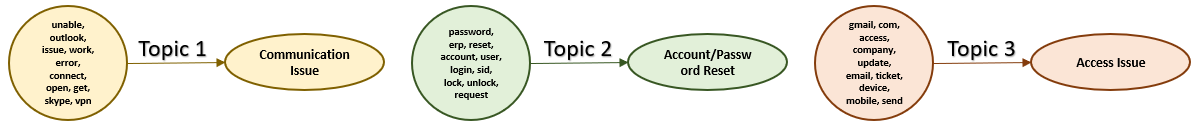

#### 6. Model Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [16]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.800106460957963

Coherence Score:  0.4568991626530355


#### 7. Visualize the topics-keywords
Examine the produced topics and the associated keywords using pyLDAvis.

In [37]:
# Visualize the topics
pyLDAvis.save_html(pyLDAvis.gensim.prepare(lda_model, corpus, id2word), 'lda.html')
IFrame(src='./lda.html', width=1220, height=858)

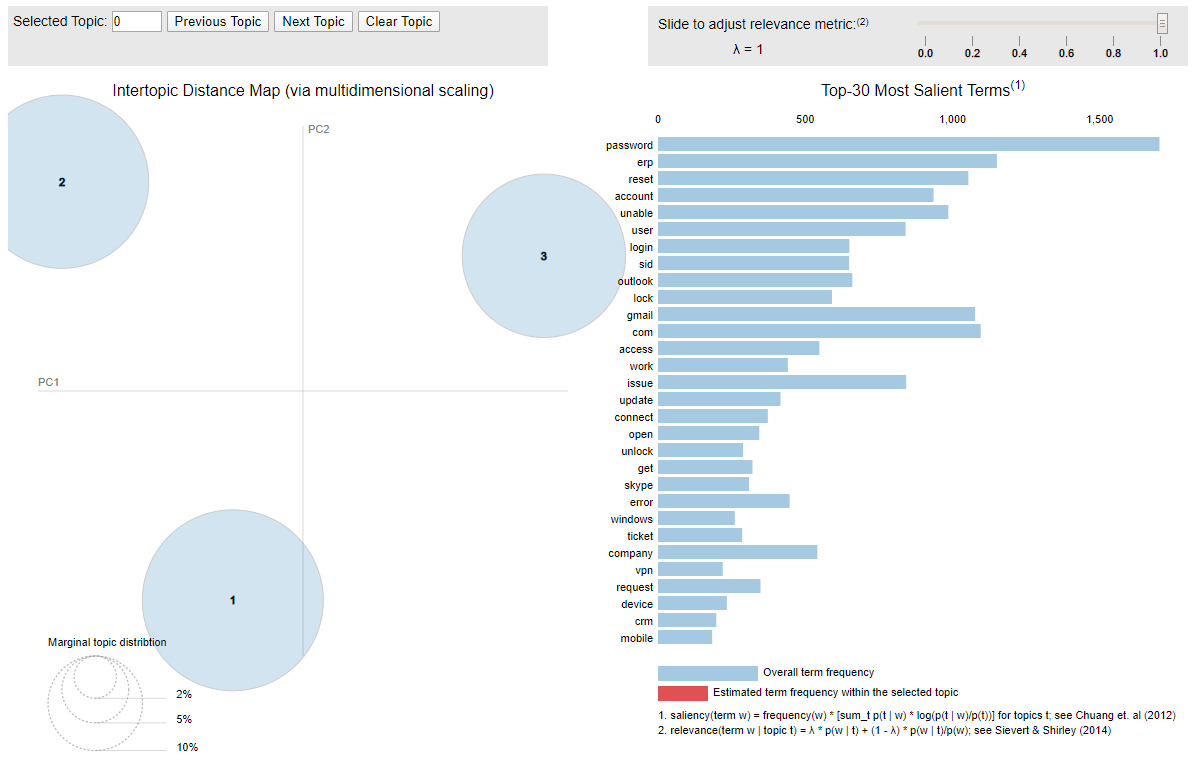
#### 8. Topic assignment for GRP_0 tickets
Run LDA for each record of GRP_0 to find the associated topic based on the LDA score. As the topic modeling has been trained to accomodate only top 3 topics for entire GRP_0 data, any record scoring less than 50%, we categorize them into 4th(other) topic and such tickets are not the candidates for resampling.

In [18]:
# Function to Determine topic
TOPICS = {1:"Communication Issue", 2:"Account/Password Reset", 3:"Access Issue", 4:"Other Issues"}
def get_groups(text):
    bow_vector = id2word.doc2bow([word for word in simple_preprocess(text) if word not in STOP_WORDS])
    index, score = sorted(lda_model[bow_vector][0], key=lambda tup: tup[1], reverse=True)[0]
    return TOPICS[index+1 if score > 0.5 else 4], round(score, 2)

# Check for a Random record
text = grp0_tickets.reset_index().loc[np.random.randint(0, grp0_tickets.shape[1]),'Summary']
topic, score = get_groups(text)
print("\033[1mText:\033[0m {}\n\033[1mTopic:\033[0m {}\n\033[1mScore:\033[0m {}".format(text, topic, score))

Text: outlook receive from hmjdrvpb.komuaywn@gmail.com hello team meetingsskype meeting etc be not appear in outlook calendar can somebody please advise how to correct this kind
Topic: Communication Issue
Score: 0.5099999904632568


In [19]:
# Apply the function to the dataset
grp0_tickets.insert(loc=grp0_tickets.shape[1]-1, 
                   column='Topic', 
                   value=[get_groups(text)[0] for text in grp0_tickets.Summary])
grp0_tickets.head()

,Short description,Description,Language,Summary,Shift,Lines,Topic,Assignment group
0,login issue,verified user detailsemployee manager name che...,English,login issue verified user detailsemployee mana...,General,5,Account/Password Reset,GRP_0
1,outlook,receive from hmjdrvpb.komuaywn@gmail.com hello...,English,outlook receive from hmjdrvpb.komuaywn@gmail.c...,General,7,Communication Issue,GRP_0
2,can not log in to vpn,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,English,can not log in to vpn receive from eylqgodm.yb...,General,7,Access Issue,GRP_0
3,unable to access hrtool page,unable to access hrtool page,English,unable to access hrtool page unable to access ...,General,1,Access Issue,GRP_0
4,error skype,error skype,English,error skype error skype,General,1,Communication Issue,GRP_0


In [20]:
# Count the records based on Topics
grp0_tickets.Topic.value_counts()

Account/Password Reset    1308
Communication Issue       1304
Access Issue              1022
Other Issues               342
Name: Topic, dtype: int64

**Observations**:
- From the above analysis, it's evident that the tope 3 topics are present in maximum numbers. The ratio of top 3 topics and other topic is $33:33:26:8$
- Except for the Other Issues, rest 3 categories of records can be down sampled to balance the dataset

#### 9. Down-sampling the majority topics under GRP_0
Under-sample the majority class(es) by randomly picking samples with or without replacement. We're using RandomUnderSampler class from imblearn.

In [21]:
# Instantiate the UnderSampler class
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=0)
# Fit the data
X_res, y_res = sampler.fit_resample(grp0_tickets.drop(['Assignment group','Topic'], axis=1), grp0_tickets.Topic)
# Check the ratio of output topics
y_res.value_counts()

Communication Issue       342
Account/Password Reset    342
Access Issue              342
Other Issues              342
Name: Topic, dtype: int64

**Observation:**<br/>
The output of the UnderSampling technique shows that all the 4 distinct topics are resampled to exactly match the records in each topic making them a perfectly balanced distribution under GRP_0.

Let's combine the Topic and Assignment group columns to maintain a single target attribute.

In [22]:
# Combine Topic and Assignment Group columns
grp0_tickets = pd.concat([X_res, y_res], axis=1)
grp0_tickets['Assignment group'] = grp0_tickets['Topic'].apply(lambda x: f'GRP_0 ({x})')
# Drop the Topic column
grp0_tickets.drop(['Topic'], axis=1, inplace=True)
print(f"\033[1mNew size of GRP_0 tickets:\033[0m {grp0_tickets.shape}")
grp0_tickets.head()

New size of GRP_0 tickets: (1368, 7)


,Short description,Description,Language,Summary,Shift,Lines,Assignment group
0,can not access to company collaborationplatform,receive from zywoxerf.paqxtrfk@gmail.com dear ...,English,can not access to company collaborationplatfor...,General,7,GRP_0 (Access Issue)
1,need the username to submit the insurance,need the username to submit the insurance,English,need the username to submit the insurance need...,General,1,GRP_0 (Access Issue)
2,login not possible for trail employee thsaqsh,receive from jhyazros.azdxonjg@gmail.com hello...,English,login not possible for trail employee thsaqsh ...,General,9,GRP_0 (Access Issue)
3,unable to access travel site,unable to access travel site,English,unable to access travel site unable to access ...,General,1,GRP_0 (Access Issue)
4,vpv i get this message when i try to log on to...,receive from bwfhtumx.japznrvb@gmail.com cidim...,English,vpv i get this message when i try to log on to...,General,7,GRP_0 (Access Issue)


#### 10. Club groups with lesser tickets assigned
Combine all groups with less than 25 tickets assigned into one separate group named ***Miscellaneous***

In [23]:
# Find out the Assignment Groups with less than equal to 25 tickets assigned
rare_tickets = ticket.groupby(['Assignment group']).filter(lambda x: len(x) <= 25)
print('\033[1m#Groups with less than equal to 25 tickets assigned:\033[0m', rare_tickets['Assignment group'].nunique())

# Visualize the distribution
rare_tickets['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-orrd',
    title='#Records by rare Assignment Groups- Histogram')

# Rename the Assignment group attribute
rare_tickets['Assignment group'] = 'Miscellaneous'

#Groups with less than equal to 25 tickets assigned: 37


#### 11. Join and prepare the balanced dataset
Let's club together resampled topics under GRP_0 with Miscellaneous group with less than 25 tickets with all others

In [24]:
# Find tickets with good number of tickets assigned
good_tickets = ticket.iloc[[idx for idx in ticket.index if idx not in rare_tickets.index]]
good_tickets = good_tickets[good_tickets['Assignment group'] != 'GRP_0']

# Join all the 3 datasets
ticket = pd.concat([grp0_tickets, good_tickets, rare_tickets]).reset_index(drop=True)

# Serialize the balanced dataset
with open('balanced_ticket.pkl','wb') as f:
    pickle.dump(ticket[['Summary','Assignment group']], f, pickle.HIGHEST_PROTOCOL)

ticket.head()

,Short description,Description,Language,Summary,Shift,Lines,Assignment group
0,can not access to company collaborationplatform,receive from zywoxerf.paqxtrfk@gmail.com dear ...,English,can not access to company collaborationplatfor...,General,7,GRP_0 (Access Issue)
1,need the username to submit the insurance,need the username to submit the insurance,English,need the username to submit the insurance need...,General,1,GRP_0 (Access Issue)
2,login not possible for trail employee thsaqsh,receive from jhyazros.azdxonjg@gmail.com hello...,English,login not possible for trail employee thsaqsh ...,General,9,GRP_0 (Access Issue)
3,unable to access travel site,unable to access travel site,English,unable to access travel site unable to access ...,General,1,GRP_0 (Access Issue)
4,vpv i get this message when i try to log on to...,receive from bwfhtumx.japznrvb@gmail.com cidim...,English,vpv i get this message when i try to log on to...,General,7,GRP_0 (Access Issue)


In [25]:
# Visualize the assignment groups distribution
print('\033[1m#Unique groups remaining:\033[0m', ticket['Assignment group'].nunique())
pd.DataFrame(ticket.groupby('Assignment group').size(),columns = ['Count']).reset_index().iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='#Records by Assignment groups',
    pull=np.linspace(0,0.3,ticket['Assignment group'].nunique()))

#Unique groups remaining: 41


**Comments:**
- It's evident from the pie chart above the dataset is nearly balanced which can be considered for model building.

## <u>Model Building</u>
Let's load the balanced dataset and Word2Vec model to generate word embbeddings and feed it into LSTM.

### <u>RNN with LSTM networks</u>
Long Short-Term Memory~(LSTM) was introduced by S. Hochreiter and J. Schmidhuber and developed by many research scientists.

To deal with these problems Long Short-Term Memory (LSTM) is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem as LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state. The figure shows the basic cell of a LSTM model.

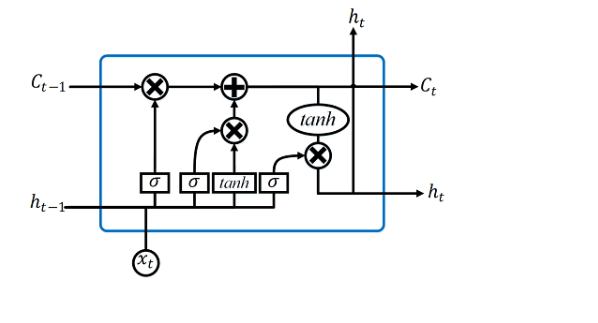

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [26]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [27]:
# Load the balanced dataset
with open('balanced_ticket.pkl','rb') as f:
    ticket = pickle.load(f)
# Load the Word2Vec model
wmodel = Doc2Vec.load('d2v_inc_model.mdl')

In [33]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 19400 - Embedding Dim: 300


In [34]:
# Sequences will be padded or truncated to this length
MAX_SEQUENCE_LENGTH = 75

# Prepare the embbedings with 0's padding to max sequence length
X = ticket.Summary.values.tolist()
set_X=[]
for sent in X:
  #print(sent[0])
  set_X.append(np.array([word2token(w) for w in tokenize_sentences(sent[0])[:MAX_SEQUENCE_LENGTH] if w != '']))

set_X = pad_sequences(set_X, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
y = pd.get_dummies(upsmpl_dset['group']).values
print('Shape of label Y:', (27470, 41))
print('Shape of label X:', (27470, 75))

Shape of label Y: (27470, 41)
Shape of label X: (27470, 75)


In [35]:
# Divide the original dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(set_X, y, test_size=0.3, random_state=47)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(19229, 75) (8241, 75) (19229, 41) (8241, 41)


In [52]:
# Visualize a random training sample
X_train[67]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,  1890,  1066,   185,
           0,  1890,   459,  3715,  1890,  1066,   185,     0,  1890,
         459,  3715,  6389,  1097,  1890, 14504,  2248,    40,  1348,
         804,  1271,   260], dtype=int32)

In [53]:
# CREATE the MODEL

# Samples of categories with less than this number of samples will be ignored
DROP_THRESHOLD = 10000
model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.2))
model_seq.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model_seq.fit(X_train, 
                        Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Train on 17306 samples, validate on 1923 samples
Epoch 1/20
17306/17306 [==============================] - 71s 4ms/step - loss: 2.7391 - acc: 0.2600 - val_loss: 1.8067 - val_acc: 0.4893
Epoch 2/20
17306/17306 [==============================] - 68s 4ms/step - loss: 1.6989 - acc: 0.5259 - val_loss: 1.2630 - val_acc: 0.6453
Epoch 3/20
17306/17306 [==============================] - 68s 4ms/step - loss: 1.2872 - acc: 0.6424 - val_loss: 1.0008 - val_acc: 0.7150
Epoch 4/20
17306/17306 [==============================] - 67s 4ms/step - loss: 1.0489 - acc: 0.7076 - val_loss: 0.8288 - val_acc: 0.7577
Epoch 5/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.8877 - acc: 0.7556 - val_loss: 0.7168 - val_acc: 0.7894
Epoch 6/20
17306/17306 [====================

In [54]:
## Iteration 1 ...changing the dropout value

model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 17306 samples, validate on 1923 samples
Epoch 1/20
17306/17306 [==============================] - 70s 4ms/step - loss: 2.4506 - acc: 0.3459 - val_loss: 1.5717 - val_acc: 0.5757
Epoch 2/20
17306/17306 [==============================] - 69s 4ms/step - loss: 1.3551 - acc: 0.6298 - val_loss: 1.0543 - val_acc: 0.7150
Epoch 3/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.9840 - acc: 0.7384 - val_loss: 0.7932 - val_acc: 0.7920
Epoch 4/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.7751 - acc: 0.7847 - val_loss: 0.6645 - val_acc: 0.8185
Epoch 5/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.6358 - acc: 0.8242 - val_loss: 0.5489 - val_acc: 0.8393
Epoch 6/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.5429 - acc: 0.8473 - val_loss: 0.5011 - val_acc: 0.8601
Epoch 7/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.4804 - acc: 0.8630 - val_loss: 0.4168 - val_acc:

In [55]:
## Iteration 2 ..adding more core to LTSM

model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 17306 samples, validate on 1923 samples
Epoch 1/20
17306/17306 [==============================] - 68s 4ms/step - loss: 2.2320 - acc: 0.3925 - val_loss: 1.3308 - val_acc: 0.6365
Epoch 2/20
17306/17306 [==============================] - 68s 4ms/step - loss: 1.1154 - acc: 0.6917 - val_loss: 0.7884 - val_acc: 0.7826
Epoch 3/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.7616 - acc: 0.7887 - val_loss: 0.5929 - val_acc: 0.8310
Epoch 4/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.5980 - acc: 0.8329 - val_loss: 0.4852 - val_acc: 0.8492
Epoch 5/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.4662 - acc: 0.8706 - val_loss: 0.4057 - val_acc: 0.8721
Epoch 6/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.3935 - acc: 0.8880 - val_loss: 0.3604 - val_acc: 0.8970
Epoch 7/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.3435 - acc: 0.9000 - val_loss: 0.3185 - val_acc:

#### Finding Confidence Interval
As this iteration is having more accuracy and no overfitting, let's find out the confidence interval.

In [39]:
acc = history.history['acc']
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(acc, color="dodgerblue", label="Compact")
accr = model_seq.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]*100))

8241/8241 [==============================] - 20s 2ms/step
  Test set
     Loss: 0.265
     Accuracy: 92.768


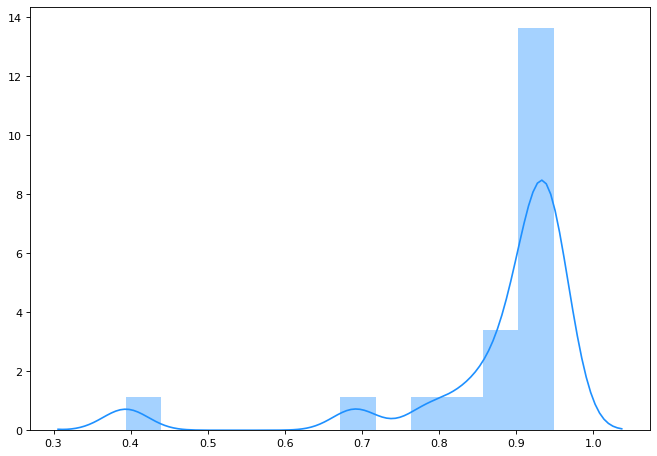

In [40]:
accuracy=0.9276
n = 8241
interval = 1.96 * np.sqrt( (accuracy * (1 - accuracy)) / n)
print(interval*100)

0.5595201963469515


**Observation**:
- There is a 95% likelihood that the confidence interval [92.21, 93.31] covers the true classification of the model on unseen data.

In [58]:
## Iteration 3 ....adding a dense and dropout and batchNormalistaion layer

model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(150, activation='relu'))
model_seq.add(BatchNormalization(momentum=0.9,epsilon=0.02))
model_seq.add(Dropout(0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 17306 samples, validate on 1923 samples
Epoch 1/20
17306/17306 [==============================] - 71s 4ms/step - loss: 2.3474 - acc: 0.3646 - val_loss: 1.3097 - val_acc: 0.6495
Epoch 2/20
17306/17306 [==============================] - 69s 4ms/step - loss: 1.1205 - acc: 0.6874 - val_loss: 0.7741 - val_acc: 0.7780
Epoch 3/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.7102 - acc: 0.7980 - val_loss: 0.5141 - val_acc: 0.8461
Epoch 4/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.5083 - acc: 0.8520 - val_loss: 0.4037 - val_acc: 0.8820
Epoch 5/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.3922 - acc: 0.8822 - val_loss: 0.3437 - val_acc: 0.9017
Epoch 6/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.3192 - acc: 0.9032 - val_loss: 0.3259 - val_acc: 0.8970
Epoch 7/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.2799 - acc: 0.9118 - val_loss: 0.2821 - val_acc:

In [72]:
## iteration 4 ...optimizing adam
from keras.optimizers import Adam

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

model_seq = Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(150, activation='relu'))
model_seq.add(BatchNormalization(momentum=0.9,epsilon=0.02))
model_seq.add(Dropout(0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        Y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 17306 samples, validate on 1923 samples
Epoch 1/20
17306/17306 [==============================] - 72s 4ms/step - loss: 2.3593 - acc: 0.3639 - val_loss: 1.3768 - val_acc: 0.6355
Epoch 2/20
17306/17306 [==============================] - 67s 4ms/step - loss: 1.1354 - acc: 0.6848 - val_loss: 0.7751 - val_acc: 0.7842
Epoch 3/20
17306/17306 [==============================] - 68s 4ms/step - loss: 0.7054 - acc: 0.7992 - val_loss: 0.5247 - val_acc: 0.8482
Epoch 4/20
17306/17306 [==============================] - 69s 4ms/step - loss: 0.5034 - acc: 0.8542 - val_loss: 0.4234 - val_acc: 0.8762
Epoch 5/20
17306/17306 [==============================] - 70s 4ms/step - loss: 0.3971 - acc: 0.8824 - val_loss: 0.3549 - val_acc: 0.8934
Epoch 6/20
17306/17306 [==============================] - 71s 4ms/step - loss: 0.3281 - acc: 0.8978 - val_loss: 0.3206 - val_acc: 0.9100
Epoch 7/20
17306/17306 [==============================] - 70s 4ms/step - loss: 0.2791 - acc: 0.9123 - val_loss: 0.2898 - val_acc:

In [73]:
accr = model_seq.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]*100))

8241/8241 [==============================] - 23s 3ms/step
Test set
  Loss: 0.318
  Accuracy: 92.549


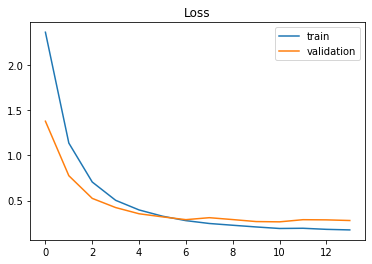

In [74]:
# Data Visualization
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

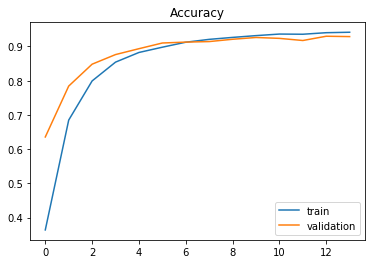

In [75]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

### Summary
The accuracy of each flavors of LSTM model is as follows in the table. This is clear indicative of how LSTM, in the family of RNN is efficient of dealing with textual data.
- We've been able to bump up the model performance upto the range 92.21 to 93.31 with 95% confidence level.
- Making the dataset balanced, helped the model to be trained more accurately.
- Creating our own word embbeddings helped finding better representation of keywords of our corpus.
- Hyperparameter tuning resulted in finding the model with more accuracy without overfitting, which is evident from the train vs. validation accuracy curve.
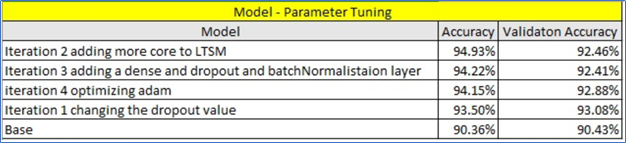

### Automation of Ticket Assignment has following benefits: -
1.	Increase in Customer Satisfaction.
2.	Decrease in the response and resolution time.
3.	Eliminate human error in Ticket Assignment. (Which was ~25% Incidents)
4.	Avoid missing SLAs due to error in Ticket Assignment.
5.	Eliminate any Financial penalty associated with missed SLAs.
6.	Excellent Customer Service.
7.	Reallocate (~1 FTE) requirement for Productive Work. 
8.	Increase in morale of L1 / L2 Team.
9.	Eradicate 15 mins Effort spent for SOP review (~25-30% of Incidents OR 531.25-637.5‬ Person Hours).
10.	Decrease in associated Expense.
11.	L1 / L2 Team can focus on resolving ~54% of the incidents
12.	Functional / L3 teams can focus on resolving ~56% of incidents

**~1 FTE from L1 / L2 Team saved through automating Ticket Assignment can focus on Continuous Improvement activities.
~25% of Incidents which is 2125 additional Incidents will now get resolved within SLA.**

### Additional Business Insights
1. Root cause analysis (RCA) need to be performed on job_scheduler, to understand the cause of failure.
No. of Incident Ticket reduction expected by performing RCA:- 1928. 
22.68% of Total Incident volume of 8500.
Hence, we can reduce the Resource / FTE allocation also by approximately 22.68%.
2. Password Rest process need to be automated.
No. of Incident Ticket reduction expected by automating password reset process:- 1246
14.66% of Total Incident volume of 8500. 
Hence, we can reduce the Resource / FTE allocation also by approximately 14.66%.
Hence a cumulative reduction of 3174 Incidents means 37.34% reduction in Total Incident volume of 8500. 
Hence, cumulative Resource / FTE allocation reduction by approximately 37.34%.
Business can operate at ~62.66% of original Estimates.